# Capstone Project - Week 1
## Function 4: 4D Optimization Challenge
### Initial Data Exploration and Analysis

**Date:** January 27, 2026

**Objective:** Maximize F4 using Bayesian Optimization

**Approach:** 
- Load and explore initial 4D samples
- Fit Gaussian Process surrogate model
- Use Expected Improvement for next point selection
- Prepare strategy for Week 2

## Section 1: Import Required Libraries

In [93]:
# Core scientific computing libraries
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Process regression and optimization
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern
from scipy.stats import norm
from scipy.optimize import minimize

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f'Libraries loaded successfully for F4 (4D)')

Libraries loaded successfully for F4 (4D)


## Section 2: Load Initial Data

Loading Week 1 initial samples for Function 4

In [94]:
# Define file paths for F4
INPUT_FILE = 'f4_initial_inputs.npy'   # Shape: (n_samples, 4)
OUTPUT_FILE = 'f4_initial_outputs.npy' # Shape: (n_samples,)

In [95]:
# Load data
X = np.load(INPUT_FILE)  # Input matrix
Y = np.load(OUTPUT_FILE) # Output vector

# Display data information
print('F4 Data Loaded:')
print(f'  Input shape:  {X.shape}')
print(f'  Output shape: {Y.shape}')
print(f'  Dimensions:   {X.shape[1]}D')
print(f'  Samples:      {len(X)}')

F4 Data Loaded:
  Input shape:  (30, 4)
  Output shape: (30,)
  Dimensions:   4D
  Samples:      30


## Section 3: Exploratory Data Analysis

In [96]:
# Ensure proper data format
X = np.atleast_4d(X)
Y = Y.ravel()

print('='*70)
print('FUNCTION 4 - INITIAL DATA ANALYSIS')
print('='*70)

# Output statistics
print(f'\nOutput Statistics:')
print(f'  Maximum:  {Y.max():.6f}')
print(f'  Minimum:  {Y.min():.6f}')
print(f'  Mean:     {Y.mean():.6f}')
print(f'  Median:   {np.median(Y):.6f}')
print(f'  Std Dev:  {Y.std():.6f}')
print(f'  Range:    {Y.max() - Y.min():.6f}')

# Find best point
best_idx = np.argmax(Y)
best_value = Y[best_idx]
best_point = X[best_idx]

print(f'\n🎯 Best Point Found (Initial Sampling):')
print(f'  Value:    {best_value:.6f}')
print(f'  Location: {best_point}')

# Input space coverage
print(f'\nInput Space Coverage:')
for i in range(X.shape[1]):
    print(f'  X{i+1}: [{X[:, i].min():.4f}, {X[:, i].max():.4f}]')

FUNCTION 4 - INITIAL DATA ANALYSIS

Output Statistics:
  Maximum:  -4.025542
  Minimum:  -32.625660
  Mean:     -17.238587
  Median:   -16.040082
  Std Dev:  7.017985
  Range:    28.600118

🎯 Best Point Found (Initial Sampling):
  Value:    -4.025542
  Location: [0.57776561 0.42877174 0.42582587 0.24900741]

Input Space Coverage:
  X1: [0.0378, 0.9856]
  X2: [0.0063, 0.9196]
  X3: [0.0422, 0.9392]
  X4: [0.0815, 0.9995]


In [97]:
##now print all the data
print("Input function 4 data: \n",np.load(INPUT_FILE))
print("Output function 4 data: \n",np.load(OUTPUT_FILE))

Input function 4 data: 
 [[0.89698105 0.72562797 0.17540431 0.70169437]
 [0.8893564  0.49958786 0.53926886 0.50878344]
 [0.25094624 0.03369313 0.14538002 0.49493242]
 [0.34696206 0.0062504  0.76056361 0.61302356]
 [0.12487118 0.12977019 0.38440048 0.2870761 ]
 [0.80130271 0.50023109 0.70664456 0.19510284]
 [0.24770826 0.06044543 0.04218635 0.44132425]
 [0.74670224 0.7570915  0.36935306 0.20656628]
 [0.40066503 0.07257425 0.88676825 0.24384229]
 [0.6260706  0.58675126 0.43880578 0.77885769]
 [0.95713529 0.59764438 0.76611385 0.77620991]
 [0.73281243 0.14524998 0.47681272 0.13336573]
 [0.65511548 0.07239183 0.68715175 0.08151656]
 [0.21973443 0.83203134 0.48286416 0.08256923]
 [0.48859419 0.2119651  0.93917791 0.37619173]
 [0.16713049 0.87655456 0.21723954 0.95980098]
 [0.21691119 0.16608583 0.24137226 0.77006248]
 [0.38748784 0.80453226 0.75179548 0.72382744]
 [0.98562189 0.66693268 0.15678328 0.8565348 ]
 [0.03782483 0.66485335 0.16198218 0.25392378]
 [0.68348638 0.9027701  0.33541983 

In [98]:
print(f"Loaded {X.shape[0]} points in {X.shape[1]}D" )
print(f"Current best : {Y.max():.6e} at {X[Y.argmax()]}")  # 
X = np.atleast_2d(X)  # Make sure X is aleays 4d
Y = Y.ravel() #  forces Y to be 1 d flat


Loaded 30 points in 4D
Current best : -4.025542e+00 at [0.57776561 0.42877174 0.42582587 0.24900741]


In [99]:
##Section 2: Fit surrogate for function 1

## Section 4: Gaussian Process Model

Fitting a GP surrogate model to learn the function landscape

In [100]:
kernel  = ConstantKernel(1.0,constant_value_bounds=(1e-10,1e10)) * RBF(length_scale=0.3,  length_scale_bounds=(0.01,10.0)) \
+ WhiteKernel(noise_level=1e-10, noise_level_bounds=(1e-12,1e-2))

In [101]:
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 30, normalize_y=False, random_state=42)

In [102]:
gp.fit(X,Y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.3) + WhiteKernel(noise_level=1e-10),
                         n_restarts_optimizer=30, random_state=42)

In [103]:
##Section 3  Define the acquision function

## Section 6: Visualization

Visualizing the optimization landscape and strategy

In [104]:
# create grid for plotting

In [105]:
n_points = 200          # lower than 1000 because 4D → memory & time
x1 = np.linspace(X[:,0].min(), X[:,0].max(), n_points)

x_plot = np.column_stack([
    x1,
    np.full(n_points, X[:,1].mean()),
    np.full(n_points, X[:,2].mean()),
     np.full(n_points, X[:,3].mean())
])

In [106]:
# Get GP Predictions 

In [107]:
mv, sigma = gp.predict(x_plot, return_std=True)

## Section 5: Acquisition Function Optimization

Using Expected Improvement to select next sampling point

In [108]:
# Calculate expected improvement

In [109]:
y_best = Y.max() # best observed value so far

In [110]:
# EI CALCULATION

In [111]:
with np.errstate(divide='warn'):
    improvement = mv - y_best
    Z = improvement / sigma
    EI = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    EI[sigma == 0.0] = 0.0

In [112]:
# FIND NEXT SAMPLING POINT 

In [113]:
x_next = x_plot[np.argmax(EI)]

In [114]:
print(f"Best current value :{y_best:.6f} at x{X[Y.argmax()][0]:.6f}")

Best current value :-4.025542 at x0.577766


In [115]:
print(f"EI data gives next point to sample: x_next = {x_next[0]:.6f},{x_next[1]:.6f}")

EI data gives next point to sample: x_next = 0.414086,0.477129


In [116]:
#Now Plot

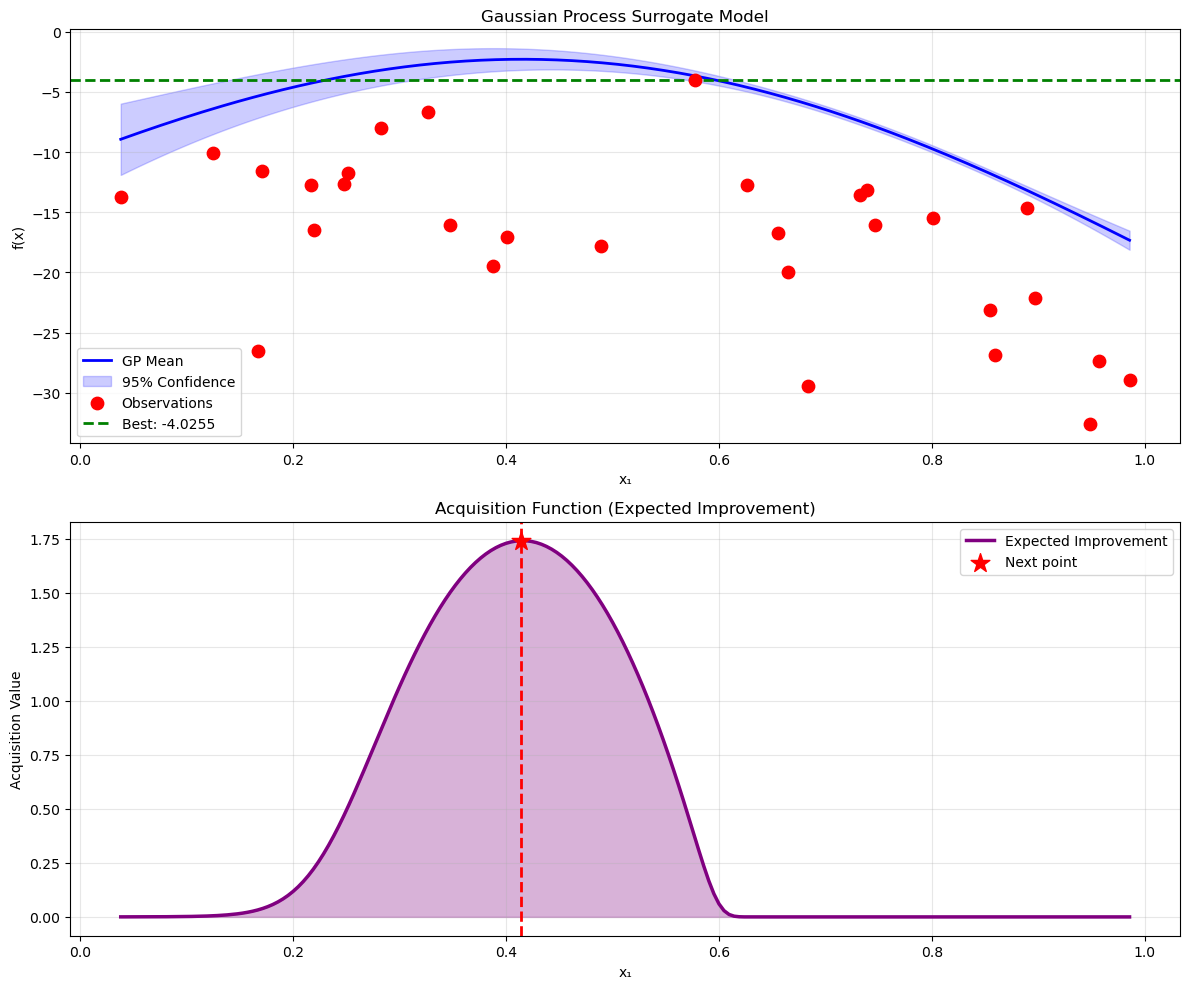

In [117]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10)) 
# Top plot: GP surrogate 
ax1.plot(x_plot[:, 0], mv, 'b-', label='GP Mean', linewidth=2) 
ax1.fill_between(x_plot[:, 0], mv - 1.96*sigma, mv + 1.96*sigma, alpha=0.2, color='blue', label='95% Confidence') 
ax1.scatter(X[:, 0], Y, c='red', s=80, zorder=10, label='Observations') 
ax1.axhline(y=y_best, color='green', linestyle='--', linewidth=2, label=f'Best: {y_best:.4f}') 
ax1.set_xlabel('x₁') 
ax1.set_ylabel('f(x)') 
ax1.set_title('Gaussian Process Surrogate Model') 
ax1.legend() 
ax1.grid(True, alpha=0.3) 
# Bottom plot: Acquisition function (EI)
ax2.plot(x_plot[:, 0], EI, 'purple', linewidth=2.5, label='Expected Improvement') 
ax2.axvline(x=x_next[0], color='red', linestyle='--', linewidth=2) 
ax2.scatter(x_next[0], np.max(EI), c='red', s=200, marker='*', zorder=10, label=f'Next point') 
ax2.fill_between(x_plot[:, 0], 0, EI, alpha=0.3, color='purple') 
ax2.set_xlabel('x₁') 
ax2.set_ylabel('Acquisition Value') 
ax2.set_title('Acquisition Function (Expected Improvement)') 
ax2.legend() 
ax2.grid(True, alpha=0.3) 
plt.tight_layout() 
plt.show()

In [118]:
##Now look for the UCB

In [119]:
# UCB Acquisition Function - Create 4D prediction grid
kappa = 2.0  # Exploration parameter

# Create grid for UCB (X1 varies, others fixed at mean)
n_points = 300
x1_ucb = np.linspace(X[:, 0].min(), X[:, 0].max(), n_points)

x_plot_ucb = np.column_stack([
    x1_ucb,
    np.full(n_points, X[:, 1].mean()),
    np.full(n_points, X[:, 2].mean()),
    np.full(n_points, X[:, 3].mean()),
])

print(f'UCB grid created: {x_plot_ucb.shape}')
print(f'Grid is 4D: X1 varies, others fixed at their means')


UCB grid created: (300, 4)
Grid is 4D: X1 varies, others fixed at their means


In [120]:
##Find Next sampling point

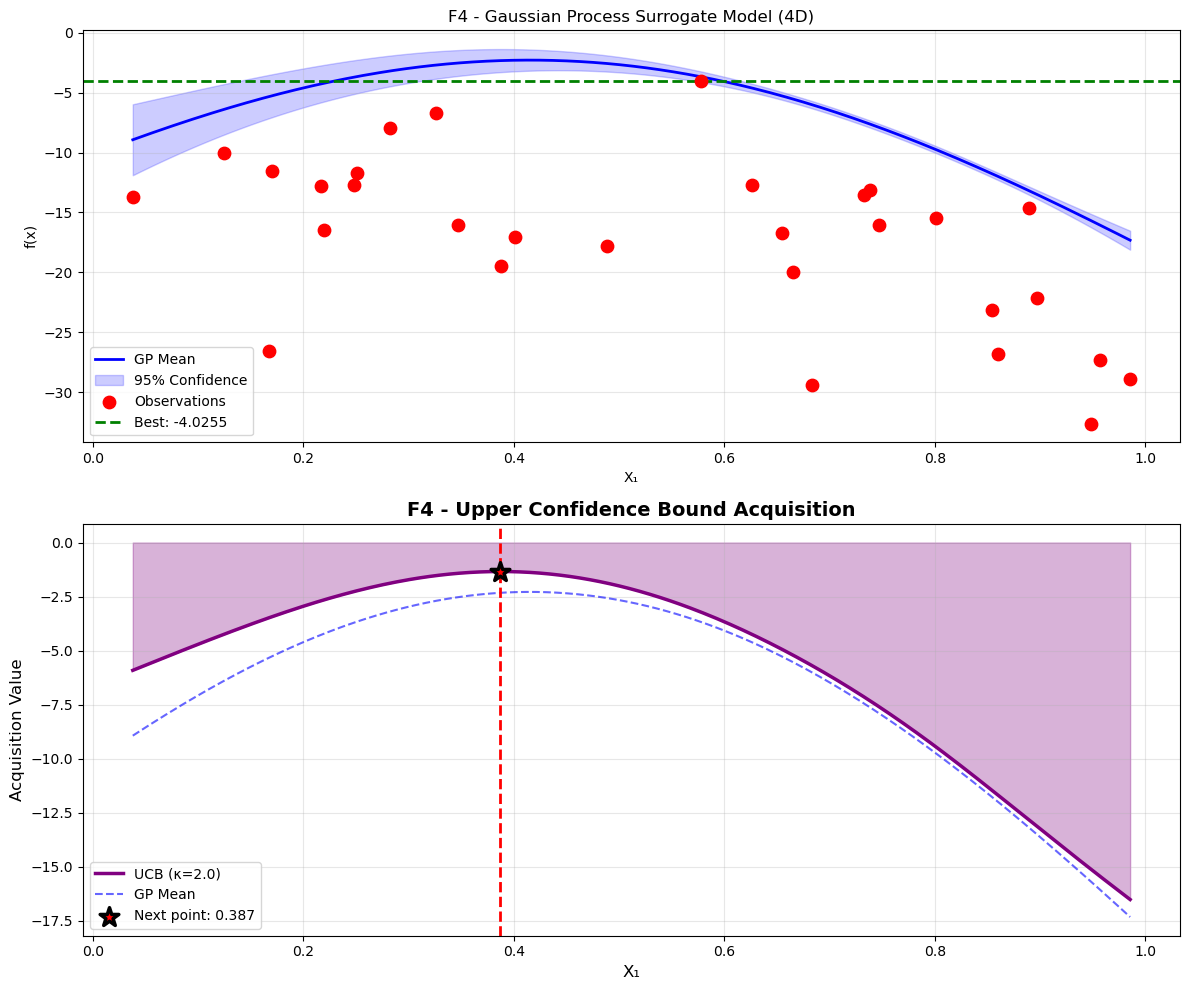


UCB suggests next point for F4: [0.38651271 0.4771286  0.46569293 0.47409631]


In [121]:
# Generate predictions on UCB grid
mv_ucb, sigma_ucb = gp.predict(x_plot_ucb, return_std=True)
UCB = mv_ucb + kappa * sigma_ucb

# Find best UCB point
x_next_idx = np.argmax(UCB)
x_next_ucb = x_plot_ucb[x_next_idx]
y_best_ucb = Y.max()

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Top plot: GP surrogate
ax1.plot(x_plot_ucb[:, 0], mv_ucb, 'b-', label='GP Mean', linewidth=2)
ax1.fill_between(x_plot_ucb[:, 0], mv_ucb - 1.96*sigma_ucb, mv_ucb + 1.96*sigma_ucb,
                 alpha=0.2, color='blue', label='95% Confidence')
ax1.scatter(X[:, 0], Y, c='red', s=80, zorder=10, label='Observations')
ax1.axhline(y=y_best_ucb, color='green', linestyle='--', linewidth=2,
            label=f'Best: {y_best_ucb:.4f}')
ax1.set_xlabel('X₁')
ax1.set_ylabel('f(x)')
ax1.set_title('F4 - Gaussian Process Surrogate Model (4D)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: UCB acquisition function
ax2.plot(x_plot_ucb[:, 0], UCB, 'purple', linewidth=2.5,
         label=f'UCB (κ={kappa})')
ax2.plot(x_plot_ucb[:, 0], mv_ucb, 'b--', linewidth=1.5, alpha=0.6,
         label='GP Mean')
ax2.axvline(x=x_next_ucb[0], color='red', linestyle='--', linewidth=2)
ax2.scatter(x_next_ucb[0], np.max(UCB), c='red', s=200, marker='*',
            zorder=10, edgecolors='black', linewidth=2.5,
            label=f'Next point: {x_next_ucb[0]:.3f}')
ax2.fill_between(x_plot_ucb[:, 0], 0, UCB, alpha=0.3, color='purple')
ax2.set_xlabel('X₁', fontsize=12)
ax2.set_ylabel('Acquisition Value', fontsize=12)
ax2.set_title('F4 - Upper Confidence Bound Acquisition', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'\nUCB suggests next point for F4: {x_next_ucb}')


In [122]:
# Format the next query point according to assignment requirements 
# Each xi must begin with 0 and have 6 decimal places 
# Extract the coordinates 
x1_next_ucb = x_next_ucb[0] 
x2_next_ucb = x_next_ucb[1] 

In [123]:
# Format to 6 decimal places, ensuring they start with 0 
query_string_ucb = f"0.{str(x1_next_ucb).split('.')[1][:6]}-0.{str(x2_next_ucb).split('.')[1][:6]}"


In [124]:
# Now print the next best sampling points for UCB and EI

In [125]:
print("\n" + "="*60) 
print("QUERY SUBMISSION") 
print("="*60) 
print(f"UCB data gives next point to sample for Function 4: x_next_ucb = {x_next_ucb[0]:.6f}, {x_next_ucb[1]:.6f},{x_next_ucb[2]:.6f},{x_next_ucb[3]:.6f}") 
print(f"EI  data gives next point to sample for Function 4: x_next = {x_next[0]:.6f}, {x_next[1]:.6f},{x_next[2]:.6f},{x_next[3]:.6f}")
print("="*60)


QUERY SUBMISSION
UCB data gives next point to sample for Function 4: x_next_ucb = 0.386513, 0.477129,0.465693,0.474096
EI  data gives next point to sample for Function 4: x_next = 0.414086, 0.477129,0.465693,0.474096
